# Predicting population using Linear Regression
### Predicting population for year 2004 - 2014 with the data available between 2015 - 2023

In [2]:
import pandas as pd

# Reading population data
pop_df = pd.read_csv('data/State population (2015-2023).csv')
# pop_df.drop(columns='total_population_2015', inplace=True)

# Adjusting the column names of pop_df
old_pop_cols = pop_df.columns[1:]
for i, j in enumerate(range(2015, 2024)):
    pop_df.rename(columns={old_pop_cols[i]: str(j)}, inplace=True)

pop_df.rename(columns={'state/union territory': 'State/Union Territory'}, inplace=True)

pop_df

,State/Union Territory,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Andaman And Nicobar Islands,389639,391652,393673,394698,396696,398703,399716,401742,402758
1,Andhra Pradesh,51067864,51428116,51713527,51997844,52282246,52566634,52851085,53037397,53222720
2,Arunachal Pradesh,1443718,1458671,1473787,1488715,1503692,1518750,1532693,1547753,1561713
3,Assam,32775532,33167525,33542455,33917539,34292462,34667531,35042532,35377488,35712028
4,Bihar,112161564,114176471,115957558,117739309,119520382,121302498,123083582,124919527,126756673
5,Chandigarh,1120489,1136499,1151507,1165520,1179528,1193534,1208541,1219546,1231551
6,Chhattisgarh,27166195,27571272,27956194,28340197,28724263,29109292,29493284,29836205,30180262
7,The Dadra And Nagar Haveli And Daman And Diu,742600,780493,839383,899273,958168,1017049,1075918,1168779,1261632
8,Delhi,18298920,18676910,19055905,19434898,19813903,20192895,20570887,20964868,21358867
9,Goa,1500559,1511533,1520559,1530558,1539554,1548561,1558572,1566563,1574568


In [160]:
# Single row data to predict 2014's population 
andaman_df = pd.DataFrame()

years = list(pop_df.drop(columns='State/Union Territory').columns)    # [::-1]
population = list(pop_df.drop(columns='State/Union Territory').loc[0])   # [::-1]

andaman_df['years'] = years
andaman_df['population'] = population

andaman_df

,years,population
0,2015,389639
1,2016,391652
2,2017,393673
3,2018,394698
4,2019,396696
5,2020,398703
6,2021,399716
7,2022,401742
8,2023,402758


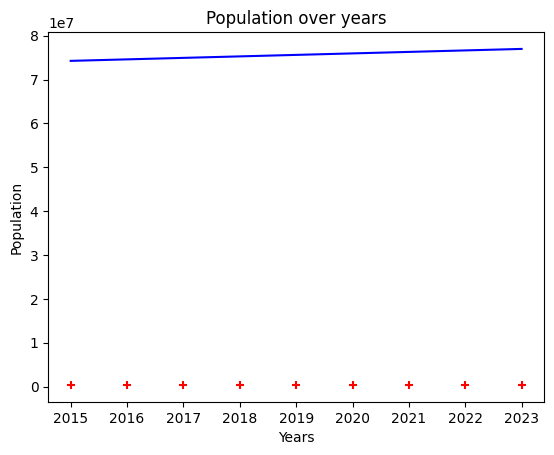

In [161]:
from matplotlib import pyplot as plt
%matplotlib inline

year = andaman_df['years']
population = andaman_df['population']

plt.scatter(year, population, color='red', marker='+')
plt.plot(year, reg.predict(andaman_df[['years']]), color='blue')      # Predicted line after performing below code

plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population over years')
plt.show()

In [162]:
import numpy as np
from sklearn import linear_model 

reg = linear_model.LinearRegression()
reg.fit(andaman_df[['years']], andaman_df['population'])    # fit() means the linear model will train on the given data

LinearRegression()

In [163]:
# This will draw the line(with slope and y-intercept) with the available data and then, it plot it and then, 
# returns where the input could be on the scatter plot

# reg.predict([[2020]])       # Raises a warning as it's just an array and there is no column names 
prediction_input = pd.DataFrame({'years': [2014]})      # Giving a dataframe as input to avoid warning
prediction_2020 = reg.predict(prediction_input)
prediction_2020

array([388349.91666667])

In [66]:
reg.coef_       # x-coefficient. x- will be the given data. Here, 2020.

array([1647.28333333])

In [67]:
reg.intercept_       # y-intercept. 

-2929278.716666667

In [68]:
m = 1647.283 
b = -2929278.71
x = 2020
y = m * x + b
print('Predicted population of the year 2014', y)

Predicted population of the year 2014 398232.9499999997


In [164]:
andaman_2004_dict = {
    'years': [i for i in range(2004, 2015)]
}

andaman_df_2004 = pd.DataFrame(andaman_2004_dict)
andaman_df_2004

,years
0,2004
1,2005
2,2006
3,2007
4,2008
5,2009
6,2010
7,2011
8,2012
9,2013


# 1. Predicting population for Andaman Nicobar from 2004 - 2014

In [165]:
# Predicting for a whole dataframe with the trained model from previous data
andaman_df_2004['population'] = reg.predict(andaman_df_2004)
andaman_df_2004

,years,population
0,2004,371877.083333
1,2005,373524.366667
2,2006,375171.650000
3,2007,376818.933333
4,2008,378466.216667
5,2009,380113.500000
6,2010,381760.783333
7,2011,383408.066667
8,2012,385055.350000
9,2013,386702.633333


# 2. Predicting population for all states from 2004 - 2014

In [173]:
# Predicting population from 2004 - 2014

final_df = pd.DataFrame()

for j in range(len(pop_df.index)):
    temp_df = pd.DataFrame()
    
    # Vertically converting avail data for training
    years = list(pop_df.drop(columns='State/Union Territory').columns)    # [::-1]
    population = list(pop_df.drop(columns='State/Union Territory').loc[j])   # [::-1]
    
    temp_df['years'] = years
    temp_df['population'] = population
    
    # Training
    reg = linear_model.LinearRegression()
    reg.fit(temp_df[['years']], temp_df['population'])
    
    
    
    # Predicting for vertical dataframe
    temp_2004_dict = {
        'years': [i for i in range(2004, 2015)]
    }
    
    temp_df_2004 = pd.DataFrame(temp_2004_dict)
    
    temp_df_2004['population'] = reg.predict(temp_df_2004)
    
    
    
    
    # Converting predicted vertical dataframe to final predicted horizontal dataframe
    
    final_df.loc[j, 'State/Union Territory'] = pop_df.loc[j]['State/Union Territory']
    
    for i in range(len(temp_df_2004.index)):
        
        year = temp_df_2004['years'][i]
        population = int(temp_df_2004['population'][i])
    
        final_df.loc[j, year] = str(population)

final_df

,State/Union Territory,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Andaman And Nicobar Islands,371877,373524,375171,376818,378466,380113,381760,383408,385055,386702,388349
1,Andhra Pradesh,48168032,48439552,48711071,48982591,49254110,49525630,49797149,50068669,50340189,50611708,50883228
2,Arunachal Pradesh,1281508,1296293,1311077,1325862,1340646,1355431,1370215,1385000,1399785,1414569,1429354
3,Assam,28745727,29114494,29483261,29852028,30220795,30589562,30958329,31327096,31695863,32064630,32433397
4,Bihar,92406852,94213933,96021013,97828094,99635175,101442255,103249336,105056417,106863497,108670578,110477659
5,Chandigarh,969656,983580,997505,1011429,1025354,1039278,1053203,1067127,1081052,1094976,1108901
6,Chhattisgarh,23034988,23413227,23791466,24169705,24547944,24926183,25304422,25682661,26060900,26439139,26817378
7,The Dadra And Nagar Haveli And Daman And Diu,13519,77383,141246,205110,268974,332838,396702,460566,524430,588294,652157
8,Delhi,14095766,14477293,14858820,15240347,15621875,16003402,16384929,16766456,17147983,17529510,17911037
9,Goa,1400214,1409466,1418719,1427972,1437224,1446477,1455729,1464982,1474234,1483487,1492740


In [175]:
# Exporting data to CSV
# final_df.to_csv('data/State population(2004-2014).csv', index=False)